<a href="https://colab.research.google.com/github/Juliana001/Projetos-pessoais--InteligenciaArtificial/blob/main/Visao_Computacional/transferenicaDeEstilo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---
### Desenvolvido por Juliana do N. Rocha durante o curso de Visão computacional da UDEMY


---



Este notebook visa trabalhar o processo de aplicar o estilo visual de uma imagem em outra imagem, ou seja, transferência de estilo. O código foi extraído do curso de visão computacional da Udemy, com pouquissimas alterações minhas.

Foi utilizada uma rede neural profunda de 19 camadas, a VGG19.



In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
tf.__version__

'2.18.0'

In [ ]:
network = tf.keras.applications.VGG19(include_top = False, weights='imagenet')

In [ ]:
network.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, None, None, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, None, None,     │        73,856 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, None, None,     │       147,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, None, None,     │       295,168 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, None, None,     │     1,180,160 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │             

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 20,024,384 (76.39 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
len(network.layers)

22

#Carregamento e pré-processamento das imagens

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


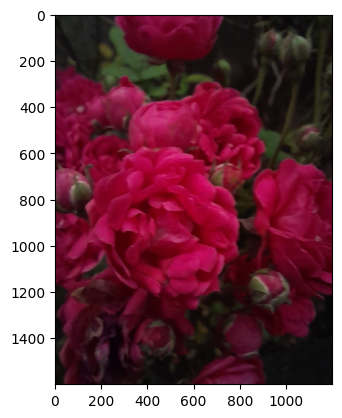

In [ ]:
imagem_conteudo = tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/PDI/pdi pessoal/Imagem do WhatsApp de 2025-04-19 à(s) 16.05.57_571ff7dd.jpg')
plt.imshow(imagem_conteudo)

In [ ]:
type(imagem_conteudo)

PIL.JpegImagePlugin.JpegImageFile

In [ ]:
imagem_conteudo = tf.keras.preprocessing.image.img_to_array(imagem_conteudo)

In [ ]:
type(imagem_conteudo)

numpy.ndarray

In [ ]:
imagem_conteudo.min(), imagem_conteudo.max()

(np.float32(0.0), np.float32(229.0))

In [ ]:
imagem_conteudo = imagem_conteudo / 255
imagem_contuedo = imagem_conteudo[tf.newaxis, :]
imagem_conteudo = tf.expand_dims(imagem_conteudo, axis=0)
imagem_conteudo.shape

TensorShape([1, 1600, 1200, 3])

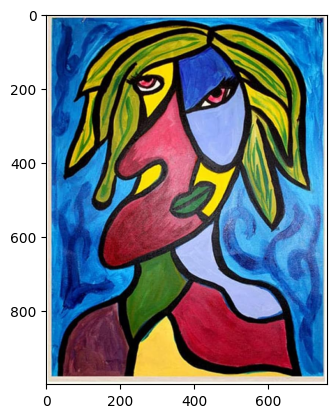

In [ ]:
imagem_estilo = tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/PDI/pdi pessoal/710WmCnsIKS._AC_UF894,1000_QL80_.jpg')
plt.imshow(imagem_estilo)

In [ ]:
imagem_estilo = tf.keras.preprocessing.image.img_to_array(imagem_estilo)
imagem_estilo = imagem_estilo /255
imagem_estilo = imagem_estilo[tf.newaxis, :]
imagem_estilo.shape

(1, 1000, 760, 3)

#Construção da rede neural

In [ ]:
camadas_conteudo = ['block4_conv2']
camadas_estilo = ['block1_conv1','block2_conv1','block3_conv1','block4_conv1','block5_conv1']

In [ ]:
numero_camadas_conteudo = len(camadas_conteudo)
numero_camadas_estilo = len(camadas_estilo)
print(numero_camadas_conteudo, numero_camadas_estilo)

1 5


In [ ]:
def vgg_camadas(nome_camadas):
  vgg = tf.keras.applications.VGG19(include_top = False, weights ='imagenet')
  vgg.trainable = False
  outputs = [vgg.get_layer(nome).output for nome in nome_camadas]
  network =  tf.keras.Model(inputs = [vgg.input], outputs = outputs)
  return network

In [ ]:
def gram_matrix(ativacoes):
  resultado = tf.linalg.einsum('bijc, bijd -> bcd', ativacoes, ativacoes)
  input_shape = tf.shape(ativacoes)
  num_locations = tf.cast(input_shape[1] * input_shape[2], tf.float32)
  return resultado/num_locations

In [ ]:
class StyleContentModel(tf.keras.models.Model):
  def __init__(self, camadas_estilo, camadas_conteudo):
    super().__init__()
    self.vgg = vgg_camadas(camadas_estilo + camadas_conteudo)
    self.camadas_estilo = camadas_estilo
    self.camadas_conteudo = camadas_conteudo
    self.numero_camadas_estilo = len(camadas_estilo)
    self.vgg.trainable = False

  def call(self, imagem):
      imagem = imagem*255.0
      imagem_preprocessada = tf.keras.applications.vgg19.preprocess_input(imagem)
      outputs = self.vgg(imagem_preprocessada)
      saidas_estilo = outputs[:self.numero_camadas_estilo]
      saidas_conteudo = outputs[self.numero_camadas_estilo:]

      saidas_estilo = [gram_matrix(camada) for camada in saidas_estilo]

      conteudo_dict = {nome_conteudo : valor for nome_conteudo, valor in zip(self.camadas_conteudo, saidas_conteudo)}
      estilo_dict = {nome_estilo : valor for nome_estilo, valor in zip(self.camadas_estilo, saidas_estilo)}

      return {'conteudo': conteudo_dict, 'estilo': estilo_dict}

In [ ]:
camadas_estilo, camadas_conteudo

(['block1_conv1',
  'block2_conv1',
  'block3_conv1',
  'block4_conv1',
  'block5_conv1'],
 ['block4_conv2'])

In [ ]:
extrator = StyleContentModel(camadas_estilo, camadas_conteudo)

In [ ]:
resultados = extrator(imagem_conteudo)

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_176']
Received: inputs=Tensor(shape=(1, 1600, 1200, 3))
  warnings.warn(msg)


In [ ]:
resultados

{'conteudo': {'block4_conv2': <tf.Tensor: shape=(1, 200, 150, 512), dtype=float32, numpy=
  array([[[[   0.      ,  201.0815  ,  228.00761 , ..., 1829.5507  ,
             574.47095 ,    0.      ],
           [   0.      ,    0.      ,    0.      , ..., 2268.8247  ,
             656.64996 ,    0.      ],
           [ 205.96188 ,    0.      ,    0.      , ..., 1710.2355  ,
             520.7791  ,    0.      ],
           ...,
           [   0.      ,    0.      ,    0.      , ..., 1461.4691  ,
               0.      ,    0.      ],
           [   0.      ,   17.968618,    0.      , ..., 1147.2811  ,
              97.93662 ,    0.      ],
           [   0.      ,  197.52992 ,    0.      , ..., 1022.87476 ,
              57.60185 ,    0.      ]],
  
          [[   0.      ,    0.      ,    0.      , ..., 2328.278   ,
             267.91953 ,    0.      ],
           [   0.      ,    0.      ,    0.      , ..., 1756.7856  ,
             374.2405  ,    0.      ],
           [   0.      ,  

In [ ]:
for chave, valor in resultados.items():
  print(chave, valor.keys())

conteudo dict_keys(['block4_conv2'])
estilo dict_keys(['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1', 'block5_conv1'])


In [ ]:
estilo_objetivo = extrator(imagem_estilo)['estilo']
conteudo_objetivo = extrator(imagem_conteudo)['conteudo']

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_176']
Received: inputs=Tensor(shape=(1, 1000, 760, 3))
  warnings.warn(msg)


In [ ]:
len(estilo_objetivo), len(conteudo_objetivo)

(5, 1)

In [ ]:
nova_imagem = tf.Variable(imagem_conteudo)

In [ ]:
### alterando aqui aplica mais ou menos da image
peso_conteudo = 1
peso_estilo = 100

In [ ]:
optimizer = tf.optimizers.Adam(learning_rate = 0.02)

#Treinamento

Época:  100 Conteudo loss:  tf.Tensor(481232.38, shape=(), dtype=float32) Estilo loss:  tf.Tensor(1632037600.0, shape=(), dtype=float32) Total loss:  tf.Tensor(32641233000.0, shape=(), dtype=float32)


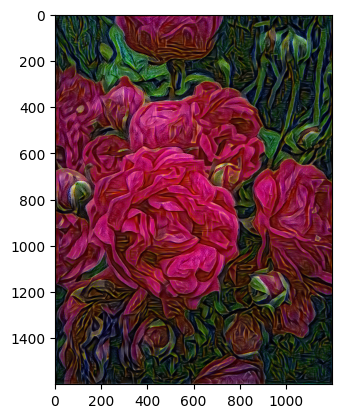

Época:  200 Conteudo loss:  tf.Tensor(491881.56, shape=(), dtype=float32) Estilo loss:  tf.Tensor(1012928640.0, shape=(), dtype=float32) Total loss:  tf.Tensor(20259066000.0, shape=(), dtype=float32)


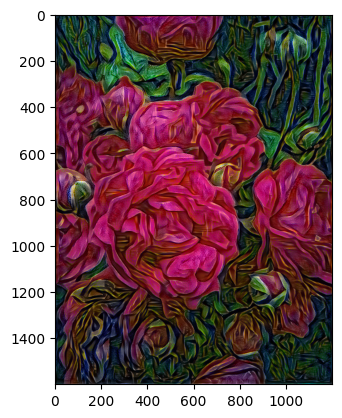

Época:  300 Conteudo loss:  tf.Tensor(500486.16, shape=(), dtype=float32) Estilo loss:  tf.Tensor(1167506600.0, shape=(), dtype=float32) Total loss:  tf.Tensor(23350630000.0, shape=(), dtype=float32)


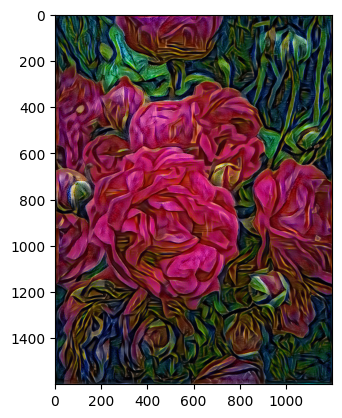

Época:  400 Conteudo loss:  tf.Tensor(496950.34, shape=(), dtype=float32) Estilo loss:  tf.Tensor(455108200.0, shape=(), dtype=float32) Total loss:  tf.Tensor(9102661000.0, shape=(), dtype=float32)


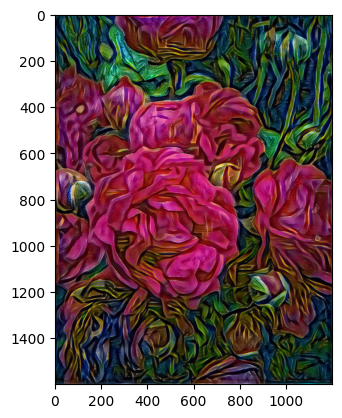

Época:  500 Conteudo loss:  tf.Tensor(500605.47, shape=(), dtype=float32) Estilo loss:  tf.Tensor(366345120.0, shape=(), dtype=float32) Total loss:  tf.Tensor(7327403500.0, shape=(), dtype=float32)


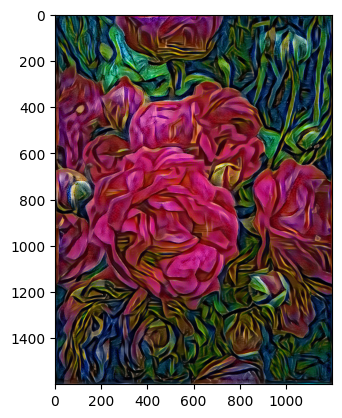

Época:  600 Conteudo loss:  tf.Tensor(505501.25, shape=(), dtype=float32) Estilo loss:  tf.Tensor(418945100.0, shape=(), dtype=float32) Total loss:  tf.Tensor(8379407400.0, shape=(), dtype=float32)


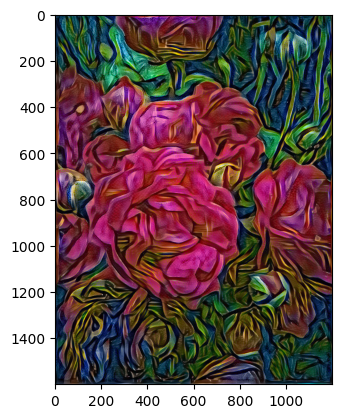

Época:  700 Conteudo loss:  tf.Tensor(506617.94, shape=(), dtype=float32) Estilo loss:  tf.Tensor(298272030.0, shape=(), dtype=float32) Total loss:  tf.Tensor(5965947000.0, shape=(), dtype=float32)


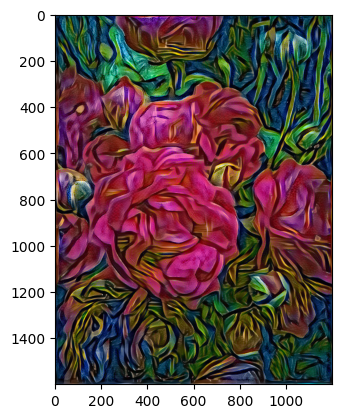

Época:  800 Conteudo loss:  tf.Tensor(508976.1, shape=(), dtype=float32) Estilo loss:  tf.Tensor(250647200.0, shape=(), dtype=float32) Total loss:  tf.Tensor(5013453000.0, shape=(), dtype=float32)


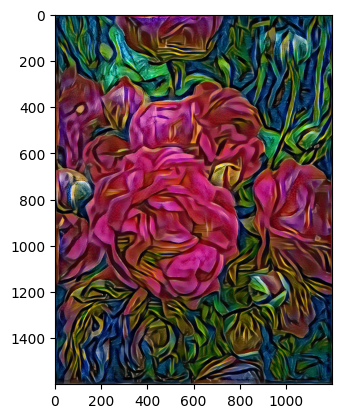

Época:  900 Conteudo loss:  tf.Tensor(512816.12, shape=(), dtype=float32) Estilo loss:  tf.Tensor(541895000.0, shape=(), dtype=float32) Total loss:  tf.Tensor(10838412000.0, shape=(), dtype=float32)


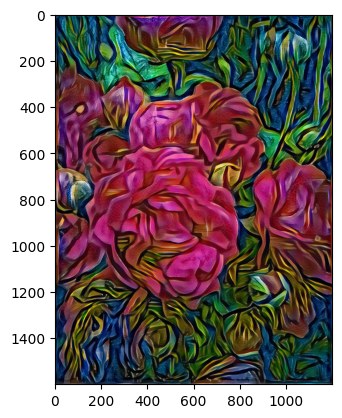

Época:  1000 Conteudo loss:  tf.Tensor(513157.5, shape=(), dtype=float32) Estilo loss:  tf.Tensor(299931420.0, shape=(), dtype=float32) Total loss:  tf.Tensor(5999141400.0, shape=(), dtype=float32)


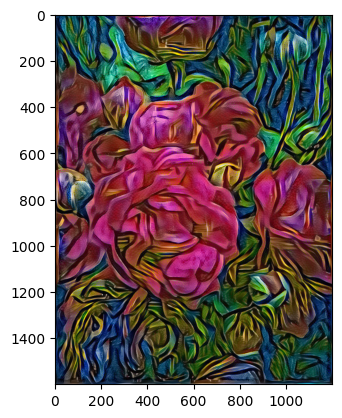

In [ ]:
epocas = 1000
impressao = 100

for epoca in range(epocas):
  with tf.GradientTape() as tape:
    outputs = extrator(nova_imagem)

    saidas_conteudo = outputs['conteudo']
    saidas_estilo = outputs['estilo']

    conteudo_loss=  tf.add_n([tf.reduce_mean((saidas_conteudo[nome] - conteudo_objetivo[nome]) ** 2) for nome in saidas_conteudo.keys()])
    estilo_loss = tf.add_n([tf.reduce_mean((saidas_estilo[nome] - estilo_objetivo[nome]) ** 2) for nome in saidas_estilo.keys()])

    total_loss = conteudo_loss * peso_conteudo / numero_camadas_conteudo + estilo_loss * peso_estilo/ numero_camadas_estilo

  gradiente = tape.gradient(total_loss, nova_imagem)
  optimizer.apply_gradients([(gradiente, nova_imagem)])
  nova_imagem.assign(tf.clip_by_value(nova_imagem, 0.0, 1.0))
  if(epoca + 1) % impressao == 0:
    print('Época: ', epoca + 1, 'Conteudo loss: ', conteudo_loss, 'Estilo loss: ', estilo_loss, 'Total loss: ', total_loss)
    plt.imshow(tf.squeeze(nova_imagem, axis = 0))
    plt.show()